# Deep Neural Networks 모델 성능 개선 기법들

## 최적화와 과대적합(Overfitting) 과소적합(underfitting)
- **<font size='5'>최적화(Optimization)와 일반화(generalization)</font>**
    - **최적화(Optimization)**
        - train data에서 최고의 성능을 얻으려고 모델 파라미터들을 조정하는 과정 (옵티마이저가 함)
    - **일반화(Generalization)**
        - 훈련된 모델이 **처음 보는 데이터**에서 대해 잘 추론할 수 있는 상태
        - 학습을 통해 일반화된 특징들을 잘 찾은 상태
    - **과대적합(Overfitting)**
        - 검증 결과 Train set에 대한 성능은 좋은데 Validation set에 대한 성능은 안좋은 상태로 모델이 **학습을 과하게(overfitting)한** 상태
        - 학습이 과하게 되어 쓸데 없는 패턴을 모두 외워버려 오히려 처음본 데이터에 대한 예측 성능 저하
        - 보통 Train dataset의 크기에 비해 모델이 너무 복잡한 경우 발생
        - 보통 과적합이라고 하면 Overfitting을 의미
    - **과소적합(Underfitting)**
        - 검증 결과 Train set과 Validation set 모두 성능이 안좋은 상태로 모델의 **학습이 덜(underfitting)된** 상태
        - Train dataset의 크기에 비해 모델이 너무 단순한 해서 데이터에 대한 특징들을 다 찾지 못한 상태

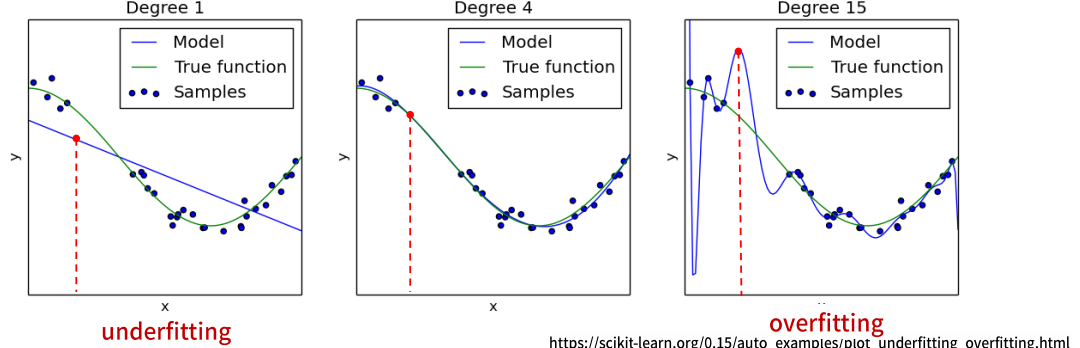

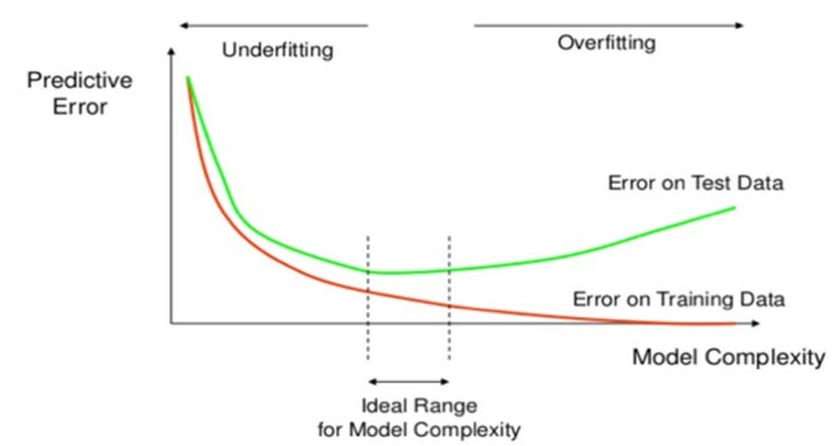


### 과소적합(Underfitting) 개선
- 모델의 복잡도 상향
    - 모델 네트워크의 크기 증가
        - Layer나 Unit 개수 증가
- Epoch (또는 Step) 수 증가 
    - Train/Validation의 성능이 계속 좋아지는 상태에서 끝난 경우 더 학습을 시킴

### 과대적합(Overfitting) 개선
- **더 많은 data를 수집**
    - 모델이 복잡해도 학습 시킬 데이터가 충분히 많으면 괜찮음
    - 일반적으로 데이터를 늘리는데는 시간과 돈이 많이 필요
    - 단 이미지의 경우 크기를 줄인다거나 회전 시키는 것등의 방식을 통해 데이터를 어느정도 증가 가능(Image Augmentation)
- **모델의 복잡도를 낮춰 단순한 모델 생성**
    - 네트워크 모델의 크기 감소
    - 모델의 학습을 규제하는 기법을 적용
- **Epoch(또는 step) 수 감소**
    - Validation의 성능 지표가 가장 좋았던 Epoch 까지만 학습

- <font size="5">과대적합을 방지하기 위한 규제 방식은 모두 모델을 간단하게 만드는 방법들</font>

### Epoch과  과적합
- 데이터셋을 여러번 반복 학습을 하게 되면 **초반에는** train, validation 성능이 모두 개선
- 그러나 **학습이 계속 반복 시** train 의 성능은 계속 좋아지지만 어느시점 부터는 Overfitting이 발생하여 **validation의 성능 저하 발생**
- Epoch을 반복하는 것은 같은 데이터셋을 반복적으로 학습하는 것이기 때문에 적절한 Epoch수를 넘어가면 Overfitting이 발생
- Validation set의 성능이 나빠지기 전의 반복횟수를 모델의 최적의 Epoch으로 선택

## DNN 모델  크기 변경

- 모델의 layer나 unit 수가 많을 수록 복잡한 모델
- Overfitting일 경우 모델을 간단하게 만들고 Underfitting일 경우 모델을 크게 생성
    - Layer의 수, 각 layer의 unit 수를 조정 
- 큰 모델에서 시작하여 layer나 unit수를 줄여가며 validation loss의 감소 추세를 관찰 (또는 반대로)

- #### 데이터에 비해 작은 모델의 특징
    - Train/Validation 성능 개선의 속도가 느림
        - 반복횟수가 충분하지 않으면 학습이 덜된 상태에서 중단 가능성 존재
    - Underfitting이 발생할 가능성이 큼
    
- #### 데이터에 비해 큰 모델의 특징
    - Validation 이 성능이 학습 초반부터 낮음
    - Train에 대한 성능은 빠르게 개선
    - Overfitting 발생할 가능성이 큼

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

np.random.seed(0)
tf.random.set_seed(0)

#### 학습결과 시각화 함수

In [2]:
# epoch별 loss를 시각화하는 함수
def plot_loss(epochs, history):
    """
    학습 loss를 시각화 하는 함수
    """
    plt.figure(figsize=(8,7))
    plt.plot(range(1, epochs+1), history.history['loss'], label='Train Loss')
    plt.plot(range(1, epochs+1), history.history['val_loss'], label='Validation Loss')
    plt.title("Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()    

In [3]:
# epoch별 accuracy를 시각화하는 함수
def plot_accuracy(epochs, history):
    """
    학습 Accuracy를 시각화 하는 함수
    """
    plt.figure(figsize=(8,7))
    plt.plot(range(1, epochs+1), history.history['accuracy'], label='Train Accuracy')
    plt.plot(range(1, epochs+1), history.history['val_accuracy'], 
                                                 label='Validation Accuracy')
    plt.title("Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()  

#### 데이터 로딩
- MNIST 숫자 손글씨 데이터

In [4]:
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()

In [5]:
train_image.shape, test_image.shape

((60000, 28, 28), (10000, 28, 28))

#### 하이퍼파라미터 변수 정의

In [6]:
# 하이퍼 파라이터 변수
LEARNING_RATE = 0.001 # 학습률 - optimizer에 설정
N_EPOCHS = 20 # epoch 수
N_BATCHS = 100 # batch size

# trian/test 데이터 개수 변수 정의
N_TRAIN = train_image.shape[0]
N_TEST = test_image.shape[0]

#### 전처리
- image : 0 ~ 1 사이의 값으로 정규화
- label : one hot encoding (다중분류문제이므로)

In [7]:
train_image.dtype

dtype('uint8')

In [8]:
X_train = (train_image).astype("float32")/255.0
X_test = (test_image).astype('float32')/255.0

In [9]:
y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

In [10]:
np.min(X_train), np.max(X_train), np.min(X_test), np.max(X_test)

(0.0, 1.0, 0.0, 1.0)

In [11]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

#### Dataset 생성

In [12]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                               .shuffle(N_TRAIN)\
                               .batch(N_BATCHS, drop_remainder=True)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

### 모델의 크기 변경

#### 작은 모델

In [13]:
def create_small_model():
    #모델생성
    model = keras.Sequential()
    # 레이어 추가 - Hidden
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(units=1, activation='relu'))
    # 출력레이어 - 다중 분류 : unit수 - 클래스 수, activation - softmax
    model.add(layers.Dense(units=10, activation='softmax'))
    return model

In [14]:
# 모델 생성, 컴파일
small_model =  create_small_model()
# 다중 분류 : loss='categorical_crossentropy'
small_model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [15]:
small_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1)                 785       
                                                                 
 dense_1 (Dense)             (None, 10)                20        
                                                                 
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


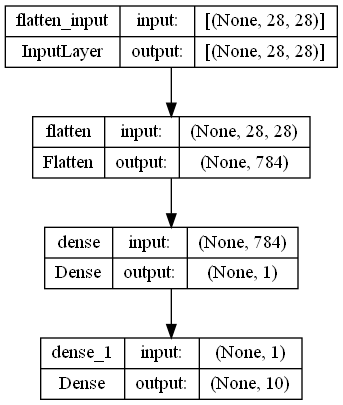

In [16]:
keras.utils.plot_model(small_model, show_shapes=True)

In [17]:
hist = small_model.fit(train_dataset, epochs=N_EPOCHS, 
                       validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 2s 2ms/step - loss: 2.0981 - accuracy: 0.1922 - val_loss: 1.9758 - val_accuracy: 0.2240
Epoch 2/20
600/600 [==============================] - 1s 1ms/step - loss: 1.9096 - accuracy: 0.2301 - val_loss: 1.8601 - val_accuracy: 0.2478
Epoch 3/20
600/600 [==============================] - 1s 1ms/step - loss: 1.8248 - accuracy: 0.2455 - val_loss: 1.7992 - val_accuracy: 0.2550
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 1.7779 - accuracy: 0.2595 - val_loss: 1.7630 - val_accuracy: 0.2738
Epoch 5/20
600/600 [==============================] - 1s 1ms/step - loss: 1.7476 - accuracy: 0.2717 - val_loss: 1.7367 - val_accuracy: 0.2688
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 1.7259 - accuracy: 0.2754 - val_loss: 1.7191 - val_accuracy: 0.2709
Epoch 7/20
600/600 [==============================] - 1s 1ms/step - loss: 1.7098 - accuracy: 0.2796 - val_loss: 1.7028 - val_accuracy: 0.2833
Epoch 

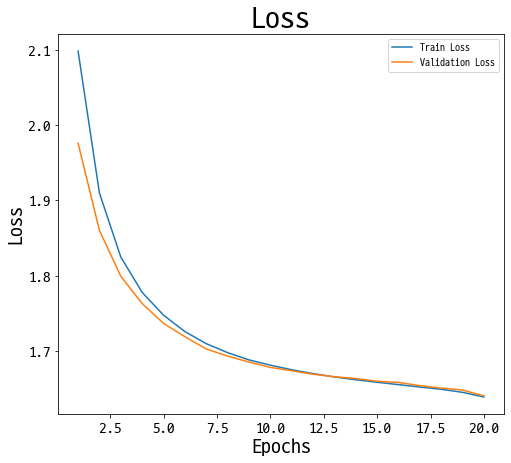

In [18]:
plot_loss(N_EPOCHS, hist)

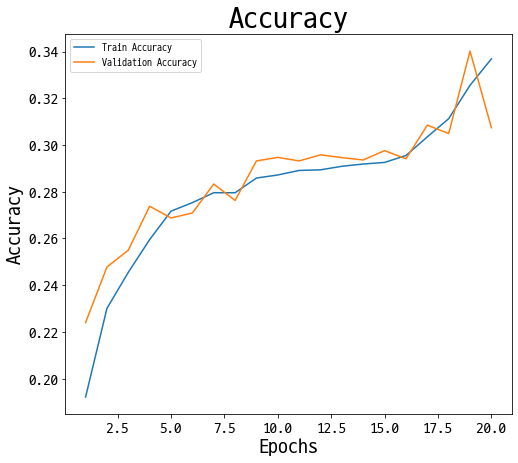

In [19]:
plot_accuracy(N_EPOCHS, hist)

#### 모델의 크기를 크게

In [20]:
def create_bigger_model():
    model = keras.Sequential()
    # Hidden Layer
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    # Output layer
    model.add(layers.Dense(units=10, activation='softmax'))
    return model

In [21]:
bigger_model = create_bigger_model()
bigger_model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [22]:
bigger_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 317,450
Trainable params: 317,450
Non-tr

In [23]:
hist = bigger_model.fit(train_dataset, 
                        epochs=N_EPOCHS, 
                        validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2487 - accuracy: 0.9250 - val_loss: 0.1196 - val_accuracy: 0.9619
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0944 - accuracy: 0.9709 - val_loss: 0.0859 - val_accuracy: 0.9739
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0631 - accuracy: 0.9804 - val_loss: 0.0871 - val_accuracy: 0.9737
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0497 - accuracy: 0.9840 - val_loss: 0.0778 - val_accuracy: 0.9784
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0410 - accuracy: 0.9866 - val_loss: 0.0814 - val_accuracy: 0.9768
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0325 - accuracy: 0.9891 - val_loss: 0.0873 - val_accuracy: 0.9754
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0287 - accuracy: 0.9906 - val_loss: 0.0783 - val_accuracy: 0.9772
Epoch 

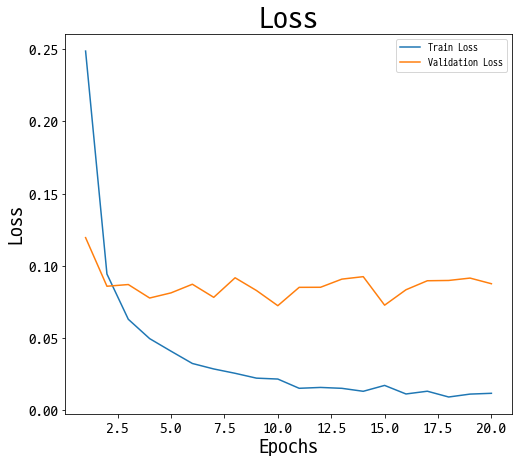

In [24]:
plot_loss(N_EPOCHS, hist)

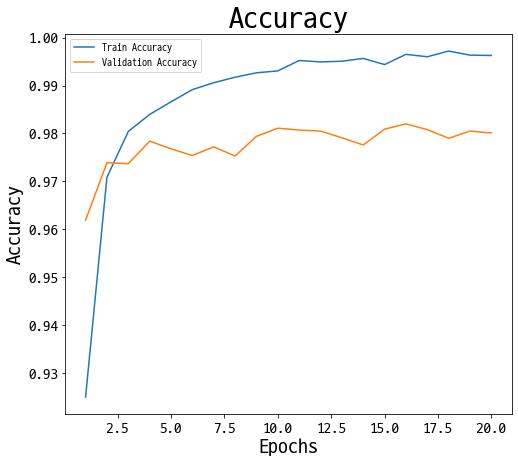

In [25]:
plot_accuracy(N_EPOCHS, hist)

##  Dropout Layer 추가를 통한 Overfitting 규제

- **Neural network의 Overfitting을 방지하기 위한 규제(regularization) 기법**
    - Overfitting의 이유는 모델이 너무 복잡하기 때문
        - 너무 복잡한 모델은 학습 시 Train dataset으로 부터 너무 많은 특징을 찾기 때문에 일반성이 떨어짐

- **Dropout Node**
    - 학습 시 일부 Unit(노드)들을 Random하게 빼고 학습, 이때 빠지는 노드들을 Dropout Node라고 함
        - 선택된 노드들의 weight들을 모두 0으로 학습, 이 노드들은 최적화 대상에서 제외
- **Dropout rate**
    - Dropout이 적용되는 Layer에서 Dropout Node의 비율로 보통 0.2~0.5 를 지정
    - 너무 크게 지정하면 underfitting이 발생
- 매 Step 마다 Dropout Node들은 random하게 변경 됨

- **효과**
    - Dropout은 overfitting의 원인인 co-adaptation 현상을 감소/방지하는 효과가 
    - co-adaptation 현상
        - 학습 시 생기는 오차를 줄이기 위해 네트워크 내의 모든 Node들의 모든 파라미터들이 업데이트
        - 발생한 오차에 대해 모든 파라미터가 공동책임으로 업데이트 되는 것
        - 따라서 각 Node들의 역할이 나눠지지 못하고 공동화되며 그로 인해 쓸데 없는 패턴까지 학습하게 되는 것
        - 이것이 overfitting의 원인
        - Dropout을 사용하게 되면 학습 시 마다 Node들을 학습에서 제외하므로 이런 co-adaptation 현상 감소 가능
        
    - Step마다 다른 network를 학습시키는 형태가 되어 앙상블(ensemble) 효과

- #### 적용
    - Dropout은 학습 시에만 적용
    - 검증, 테스트, 새로운 데이터 추론 시 미적용

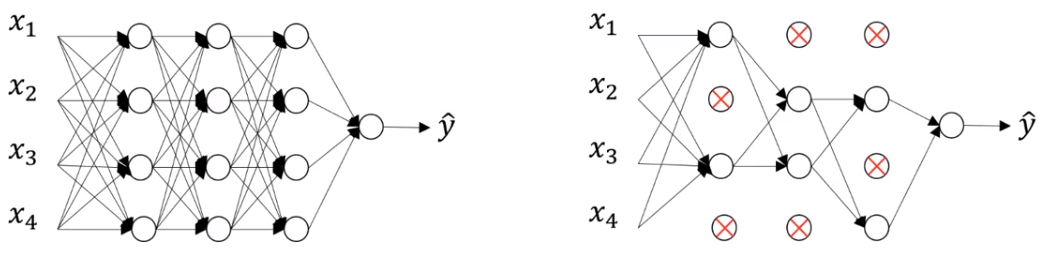

### Dropout 적용
- layers.Dropout 객체를 이용
- dropout rate는 0.2 ~ 0.5 정도로 설정
    - 규제 강도는 rate를 크게 잡을수록 증가
- dropout node를 가질 Layer 앞에 추가

In [26]:
def create_dropout_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(units=256, activation='relu'))
    
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(units=256, activation='relu'))
    
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(units=128, activation='relu'))
    
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(units=128, activation='relu'))
    
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(units=10, activation='softmax'))
    return model

In [27]:
dropout_model = create_dropout_model()
dropout_model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                      loss='categorical_crossentropy', 
                      metrics=['accuracy'])

In [28]:
dropout_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               200960    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 128)              

In [29]:
# Dropout Layer를 추가한 경우 epoch를 증가
hist = dropout_model.fit(train_dataset, 
                         epochs=N_EPOCHS+10, 
                         validation_data=test_dataset)

Epoch 1/30
600/600 [==============================] - 3s 4ms/step - loss: 0.8477 - accuracy: 0.7170 - val_loss: 0.2501 - val_accuracy: 0.9280
Epoch 2/30
600/600 [==============================] - 2s 4ms/step - loss: 0.4386 - accuracy: 0.8701 - val_loss: 0.1758 - val_accuracy: 0.9504
Epoch 3/30
600/600 [==============================] - 2s 4ms/step - loss: 0.3603 - accuracy: 0.8948 - val_loss: 0.1464 - val_accuracy: 0.9590
Epoch 4/30
600/600 [==============================] - 2s 4ms/step - loss: 0.3258 - accuracy: 0.9057 - val_loss: 0.1285 - val_accuracy: 0.9626
Epoch 5/30
600/600 [==============================] - 2s 4ms/step - loss: 0.3002 - accuracy: 0.9138 - val_loss: 0.1223 - val_accuracy: 0.9628
Epoch 6/30
600/600 [==============================] - 3s 4ms/step - loss: 0.2805 - accuracy: 0.9186 - val_loss: 0.1088 - val_accuracy: 0.9668
Epoch 7/30
600/600 [==============================] - 2s 4ms/step - loss: 0.2673 - accuracy: 0.9236 - val_loss: 0.1082 - val_accuracy: 0.9672
Epoch 

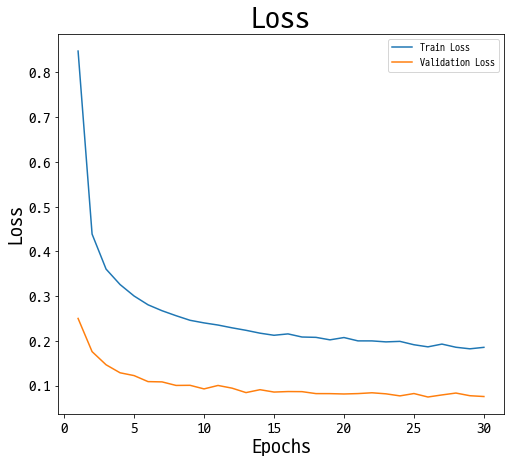

In [30]:
plot_loss(N_EPOCHS+10, hist)

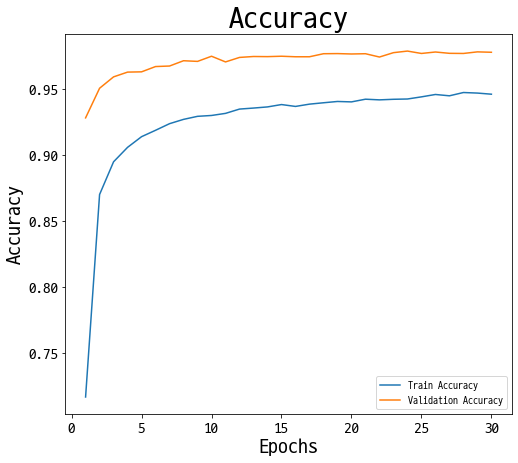

In [31]:
plot_accuracy(N_EPOCHS+10, hist)

## Batch Normalization (배치정규화)
- 각 Layer 에서 출력된 값을 평균=0, 표준편차=1로 정규화 하여 **각 Layer의 입력분포를 균일하게 생성**

### Internal Covariate Shift(내부 공변량 변화) 문제
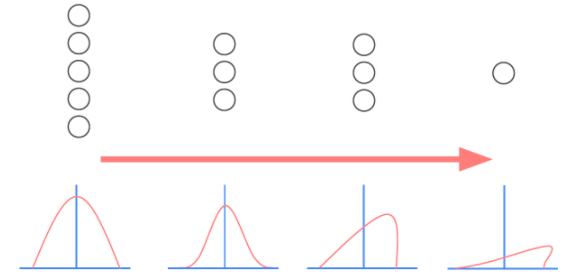
- 내부 공변량 변화란 학습 과정에서 각 층을 통과할 때 마다 입력 데이터 분포가 달라지는 현상
- 입력 데이터의 분포가 정규분포를 따르더라도 레이어를 통과하면서 그 분포가 바뀌어 성능이 떨어지는 문제가 발생 
- 각 레이어를 통과할때 마다 분포를 정규분포로 정규화하여 성능을 향상


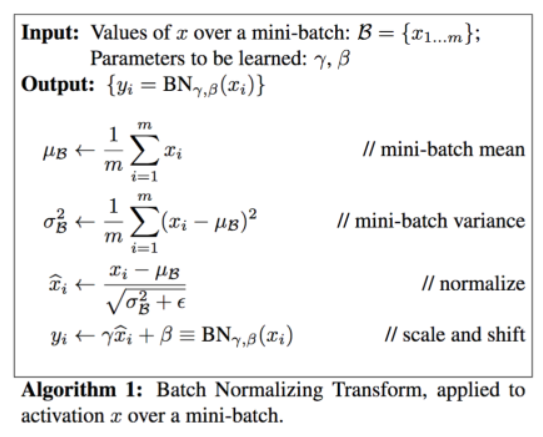

- $\gamma$: scaling 파라미터, $\beta$: shift 파라미터
    - 항상 일정한 분포로 나오는 것을 방지하기 위해 $\gamma$와  $\beta$를 이용해 분포에 약간의 변화
    - $\gamma$와  $\beta$는 학습 과정에서 최적화 되는 값

- Batch Normalization은 입력데이터와 파라미터의 가중합을 구한 결과에 적용한 뒤 그 결과를 Activation 함수에 전달
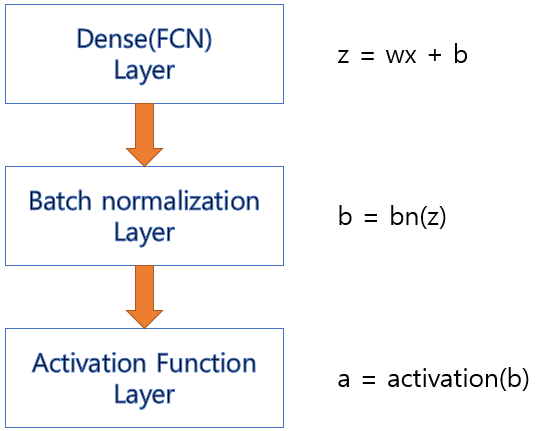

### 효과
- 랜덤하게 생성되는 초기 가중치에 대한 영향력을 감소 가능
- 학습하는 동안 과대적합에 대한 규제의 효과
- Gradient Vanishing, Gradient exploding을 막아

### Batch Normalization
- Dense -> BN -> Activation  순서로 적용
> Dense Layer : 가중합 처리</br>
> Dense(units=36) => 36개의 unit을 가지는 Dense Layer를 생성 / 각 unit은 가중합 처리</br>
> Dense(units=36, activation='relu') => 36개의 unit들이 가중합 처리하고 그 결과를 activation(relu) Layer에 전달하여 처리</br>
> => Dense layer + Activation layer
- layers.BatchNormalization 사용

In [32]:
def create_bn_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    
    model.add(layers.Dense(units=256)) # 가중합 처리
    model.add(layers.BatchNormalization()) # Batch Normalization Layer - 평균 : 0+β, 표준편차 : 1*γ의 분포
    model.add(layers.ReLU()) # activation layer : ReLu
    
    # Dropout과 같이 사용하는 경우
    # Dropout -> Dense -> BatchNormalization -> Activation
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(units=128))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    # 출력
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(units=10))
    model.add(layers.BatchNormalization())
    model.add(layers.Softmax())
    
    return model

In [33]:
bn_model = create_bn_model()
bn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [34]:
bn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 256)               0         
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                      

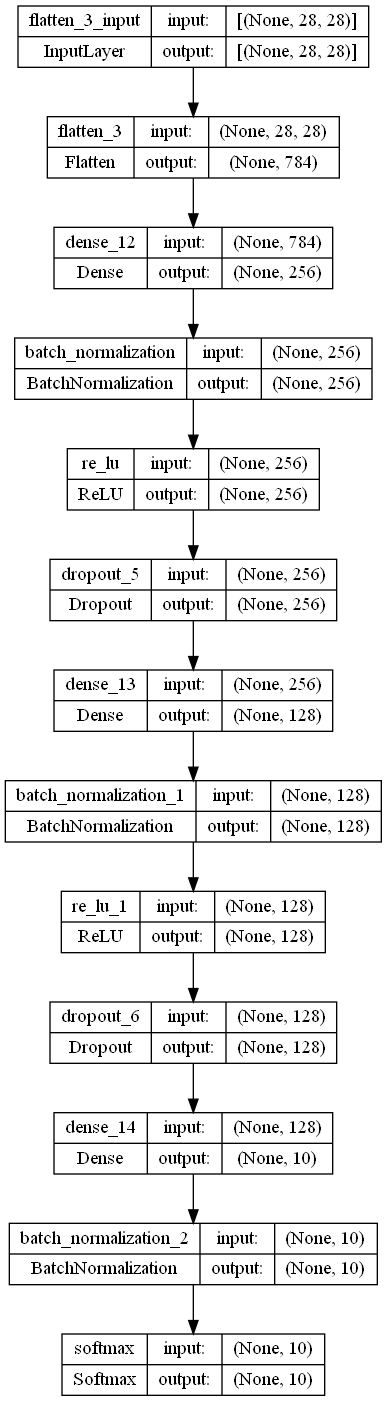

In [35]:
keras.utils.plot_model(bn_model, show_shapes=True)

In [36]:
hist = bn_model.fit(train_dataset, epochs=N_EPOCHS,
                    validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.5900 - accuracy: 0.8870 - val_loss: 0.2760 - val_accuracy: 0.9559
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2906 - accuracy: 0.9456 - val_loss: 0.1602 - val_accuracy: 0.9671
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2031 - accuracy: 0.9567 - val_loss: 0.1178 - val_accuracy: 0.9730
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1577 - accuracy: 0.9643 - val_loss: 0.0914 - val_accuracy: 0.9773
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1307 - accuracy: 0.9685 - val_loss: 0.0782 - val_accuracy: 0.9791
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1120 - accuracy: 0.9725 - val_loss: 0.0733 - val_accuracy: 0.9801
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0975 - accuracy: 0.9754 - val_loss: 0.0642 - val_accuracy: 0.9817
Epoch 

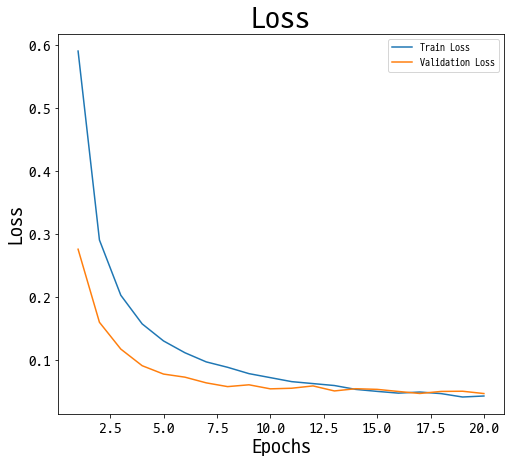

In [37]:
plot_loss(N_EPOCHS, hist)

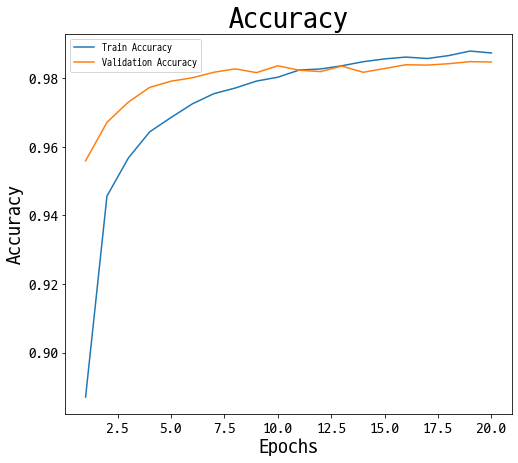

In [38]:
plot_accuracy(N_EPOCHS, hist)

## Optimizer의 Learning rate(학습율) 조정을 통한 성능향상
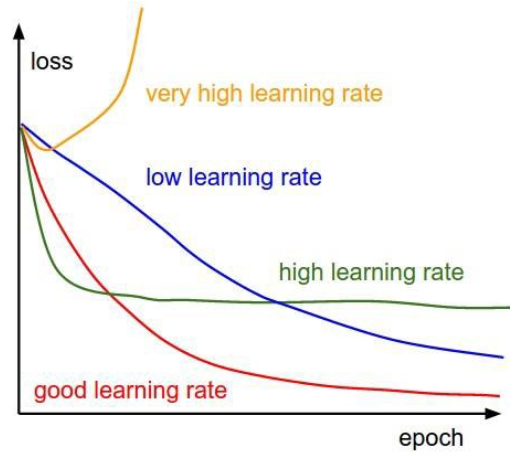
- Optimizer의 Learning rate이 너무 크거나 너무 작으면 최적의 파라미터를 찾지 못할 수 있음
- 그래서 Learning rate는 모델 성능과 밀접한 관계가 있는 아주 중요한 Hyper Parameter 
- 학습 하는 동안 고정된 하나의 Learning rate를 사용할 수도 있으나 학습이 반복되는 동안 그 값을 변경하여 성능향상을 꾀할 수 있음
    - 어떻게 조정할 지 다양한 알고리즘들 존재
        - 대표적인 것은 초기 Learning rate를 크게 잡아주고 step이 진행될 수록 줄여주는 방식

### Learning Rate Decay
- 일정한 step 마다 일정한 비율로 Learning rate를 변경
- 보통 초반에는 크게 설정하고 갈수록 줄여주는 방향으로 구현
    - 일반적으로 5 에폭마다 절반으로 줄이거나 20 에폭마다 1/10씩 감소 가능(튜닝대상)

### Callback 을 이용한 조정
- 일정 step동안 검증 성능지표가 향상되지 않으면 그때 learning rate를 조정

> Callback: 학습 도중 특정 이벤트(변화)가 발생하면 호출되도록 정의한 기능

## Hyper parameter tuning

- Parameters
    - 모델이 학습하여 데이터에 가장 적합한 값을 찾아내는 파라미터
        - Weights $W$
        - Bias $b$
- Hyper parameters
    - 모형의 구조를 결정하거나 optimization 방법을 결정하는 변수들로 개발자가 직접 설정하는 파라미터
    - Optimizer의 종류
    - learning rate($\alpha$)
    - Hidden layer의 수 
    - Hidden unit의 수 
    - Iteration의 수 
    - Activation function의 종류
    - Minibatch size 
    - Regularization
    - dropout rate
    - etc..
    
- 다양한 조합의 hyper parameter를 시도해서 loss 함수가 빠르게 감소하는 hyper parameter를 찾아내는 시도가 필요 

### Learning Rate Decay
- 일정한 step마다 일정 비율로 Learning rate를 조정

In [39]:
def create_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=10, activation='softmax'))
    return model

In [40]:
model = create_model()

In [41]:
# len(dataset객체) : epoch 당 step수
len(train_dataset)*10  # 10 에폭의 step수

6000

In [42]:
lr_scheduler = keras.optimizers.schedules.ExponentialDecay(
                    initial_learning_rate=LEARNING_RATE, # 시작 Learning Rate
                    decay_steps=len(train_dataset)*5, # 몇 step마다 변경할 것인가 (epoch단위가 아닌 step단위)
                    decay_rate=0.2, # 변경 비율 : 현재 learning_rate # decay_rate => 새로운 learning rate
                    staircase=True, # 계단식 변경여부(False : default -> 스텝마다 조금씩 변경 / True : 지정한 step에서 한번에 변경)
                    )
# LearningRate Decay 객체(ExponentialDecay)를 컴파일 시 설장하는 optimizer에 learning_rate 매개변수에 전달

In [43]:
# Learning_rate에 LearningRate scheduler를 값(0.0001)대신 성정
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_scheduler),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
hist = model.fit(train_dataset, 
                 epochs=N_EPOCHS, 
                 validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2587 - accuracy: 0.9237 - val_loss: 0.1102 - val_accuracy: 0.9662
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0955 - accuracy: 0.9708 - val_loss: 0.0930 - val_accuracy: 0.9721
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0633 - accuracy: 0.9801 - val_loss: 0.0834 - val_accuracy: 0.9756
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0456 - accuracy: 0.9855 - val_loss: 0.0852 - val_accuracy: 0.9750
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0332 - accuracy: 0.9893 - val_loss: 0.0757 - val_accuracy: 0.9800
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0125 - accuracy: 0.9965 - val_loss: 0.0621 - val_accuracy: 0.9838
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0073 - accuracy: 0.9983 - val_loss: 0.0641 - val_accuracy: 0.9828
Epoch 

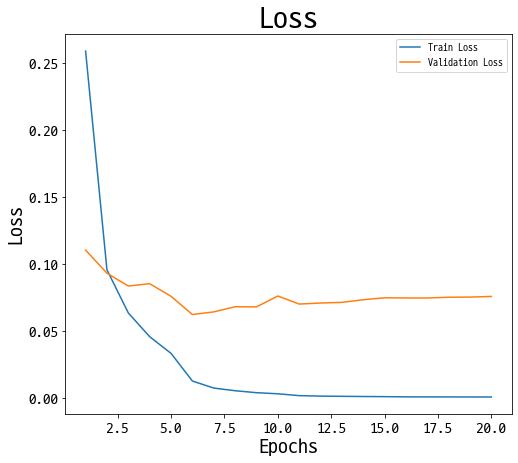

In [45]:
plot_loss(N_EPOCHS, hist)

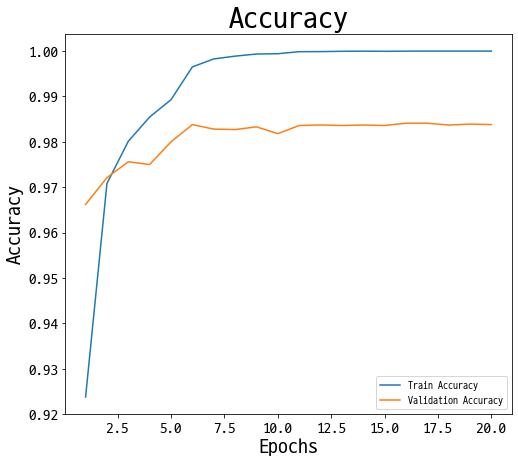

In [46]:
plot_accuracy(N_EPOCHS, hist)

### Callback 을 이용한 학습률 조정
- ReduceLROnPlateau callback을 이용
    - 학습 시 성능이 개선이 안되는 경우 LR를 조정

In [47]:
model = create_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
# ReduceLROnPlateau : 학습 중 성능 개선이 되지 않을 시(시점) Learning Rate 조정(처리)
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

lr_cb = ReduceLROnPlateau(monitor='val_loss', # 확인 할 성능 (default : val_loss)
                          factor=0.2, # 변경 비율 (현재 LR * factor => 새로운 LR)
                          patience=3, # 성능 개선이 안되는 것을 몇 epoch까지 볼 것인지 지정
                          verbose=2)  # 로그(기록) 출력

In [49]:
# callback은 fit메소드의 callbacks 매개변수에 리스트에 담아 전달
hist = model.fit(train_dataset, epochs=N_EPOCHS, 
                 validation_data=test_dataset,
                 callbacks=[lr_cb])

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2498 - accuracy: 0.9271 - val_loss: 0.1101 - val_accuracy: 0.9663 - lr: 0.0010
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0934 - accuracy: 0.9718 - val_loss: 0.0943 - val_accuracy: 0.9708 - lr: 0.0010
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0608 - accuracy: 0.9808 - val_loss: 0.0776 - val_accuracy: 0.9758 - lr: 0.0010
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0450 - accuracy: 0.9850 - val_loss: 0.0683 - val_accuracy: 0.9790 - lr: 0.0010
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0342 - accuracy: 0.9886 - val_loss: 0.0792 - val_accuracy: 0.9766 - lr: 0.0010
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0271 - accuracy: 0.9909 - val_loss: 0.0770 - val_accuracy: 0.9779 - lr: 0.0010
Epoch 7/20
581/600 [============================>.] - ETA: 0s - loss: 